In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
df = pd.read_csv(r"C:\Users\virin\Desktop\churn_prediction_model\Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Exited = Churn (1=Churned, 0=Active member)
Columns like Row number, Customer ID or Surname can be dropped as they are not important for model
We have to read the customer's behaviour to identify the probability of churn

!pip install ydata-profiling
from ydata_profiling import ProfileReport
df.profile_report()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [27]:
df.isnull().sum()
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Have to insert plots for descriptive statistics

Will convert categorical variables into numerical values using label encoding or one hot encoding  

In [28]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True) 
# for one hot encoding, we use .get_dummies

In [29]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [30]:
features = ['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain']
#Exited is the column we are predicting
x = df[features]
y = df['Exited']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [32]:
#feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
x_train[:5], x_test[:5]

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.57946723,
         -0.57638802],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  0.97481699,  1.6612541 ,  1.72572313,
         -0.57638802],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -1.02583358, -0.25280688, -0.57946723,
          1.73494238],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267, -1.02583358,  0.91539272, -0.57946723,
         -0.57638802],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.02583358, -1.05960019, -0.57946723,
         -0.57638802]]),
 array([[-0.57749609,  0.91324755, -0.6557859 , -0.69539349,  0.32993735,
          0.80843615, -1.54035103, -1.02583358, -1.01960511,  1.72572

In [34]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [35]:
y_pred = model.predict(x_test)

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(conf_matrix)
print(class_report)
print(accuracy)

[[1551   56]
 [ 211  182]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

0.8665


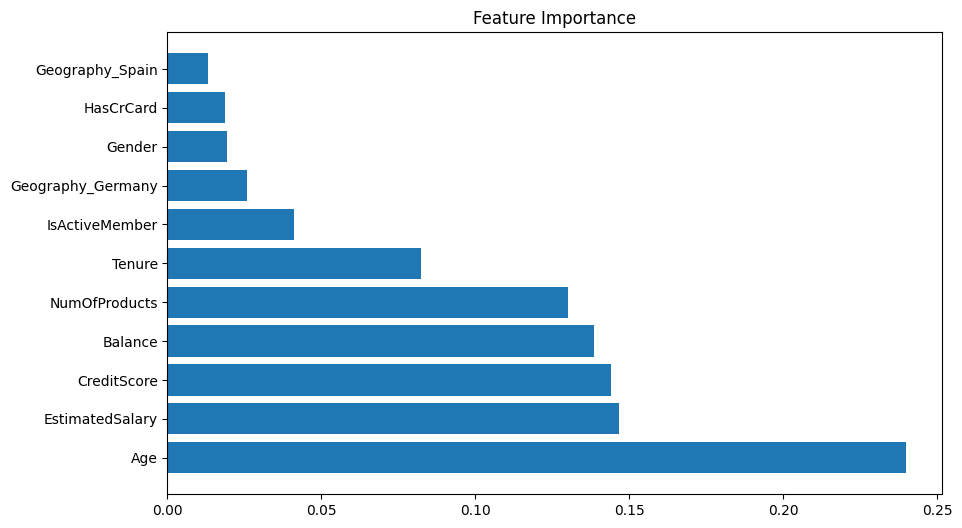

In [37]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(x.shape[1]), importances[indices]) #barh = horizontal bar chart
plt.yticks(range(x.shape[1]), names)
plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression

#Build and train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)

#Making predictions
y_pred_log_reg = log_reg.predict(x_test)

#Evaluating model
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(conf_matrix_log_reg, class_report_log_reg, accuracy_log_reg)

[[1543   64]
 [ 314   79]]               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000
 0.811


Comparatively, the LogisticRegression model, though above 80% accuracy, is less than RandomForestClassifier model which is around 86% accuracy. In LogisticRegression, we can also observe that precision and recall are lower than RandomForestClassifier and this means the post is a weaker model than the initial model

In [39]:
# Support Vector Machines (SVM) model:
from sklearn.svm import SVC

#Build and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)

#Make predictions
y_pred_svm = svm_model.predict(x_test)

#Evaluate the model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(conf_matrix_svm, class_report_svm, accuracy_svm)

[[1607    0]
 [ 393    0]]               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000
 0.8035


C:\Users\virin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\virin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\virin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_clas

The accuracy score through SVM model is around 80% which is less than the earlier models. We can observe that there are couple of warnings by Python here, indicating that for some samples, the model did not predict any samples.
As a result, the precision and recall are both 0.0. 
This typically happens when the dataset is imbalanced, and some classes have very few or no samples predicted by the model.

As an example to set the zero_division parameter to avoid the warning:
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred, average = 'macro', zero_division=0)
print("Precision:", precision)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

#Build and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

#Make predictions
y_pred_knn = knn_model.predict(x_test)

#Evaluate the model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(conf_matrix_knn, class_report_knn, accuracy_knn)

[[1514   93]
 [ 247  146]]               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000
 0.83


KNN model stands at 83% accuracy which is better than the previous models

In [41]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

#Building the model
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(x_train, y_train)

#Making predictions
y_pred_gbm = gbm_model.predict(x_test)

#Evaluating the model
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)

print(conf_matrix_gbm, class_report_gbm, accuracy_gbm)

[[1543   64]
 [ 201  192]]               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000
 0.8675


Gradient Boosting classifier's results are similar and a bit better than Random Forest Classifier which was the best model till now for this dataset. 

If this score is okay with the stakeholder, we conclude with this model, if not, we proceed with next steps like feature engineering, hyperparameter tuning or SMOTE to generate artificial data to improve it.

For example for feature engineerinhg is to create a new feature based on the existing data, like diving the customers based on the English speaking countries to the rest, Zero balance accounts to high balance accounts, divide the customers based on the age into different buckets, or based on gender to improve the model's performance.

In [42]:
#Feature engineering
df = pd.read_csv(r"C:\Users\virin\Desktop\churn_prediction_model\Churn_Modelling.csv")

#Binary feature for Balance parameter
df['BalanceZero'] = (df['Balance']==0).astype(int)

#Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins = [18, 25, 35, 45, 55, 65, 75, 85, 95], 
                    labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95 '])

#Balance to Salary Rate
df['BalanceToSalaryRatio'] = df['Balance']/df['EstimatedSalary']

#Interaction feature between NumberOfProducts and IsActiveMember
df['ProductUsage'] = df['NumOfProducts'] * df['IsActiveMember']

#Tenure grouping
df['TenureGroup'] = pd.cut(df['Tenure'], bins = [0,2,5,7,10], 
                           labels = ['0-2', '3-5', '6-7', '8-10' ])

In [43]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
df['Male_Germany'] = df['Gender'] * df['Geography_Germany']
df['Male_Spain'] = df['Gender'] * df['Geography_Spain']
df = pd.get_dummies(df, columns=['AgeGroup', 'TenureGroup'], drop_first=True)

In [44]:
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
            'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
            'Geography_Spain', 'BalanceZero', 'BalanceToSalaryRatio', 'ProductUsage',
            'Male_Germany', 'Male_Spain']+[col for col in df.columns if 'AgeGroup_'
                                           in col or 'TenureGroup_' in col]

x = df[features]
y = df['Exited']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                    random_state = 42)

In [46]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [48]:
print(conf_matrix, class_report, accuracy)

[[1547   60]
 [ 210  183]]               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000
 0.865


Comparing models on pre with post feature engineered dataset, there has been no significant imporvement in the performance including precision, recall, accuracy. Here we can also observe that the model has been performming consistently. 